## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the Data Set

In [3]:
df = pd.read_csv(r"C:\Users\uttka\Downloads\UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.shape

(1156, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Preprocessing

In [6]:
df['PURPOSE'].fillna("NOT", inplace=True) 

In [7]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], 
                                       errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], 
                                     errors='coerce')

In [8]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

df['day-night'] = pd.cut(x=df['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])


In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

## Data Visualization

In [11]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
   unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

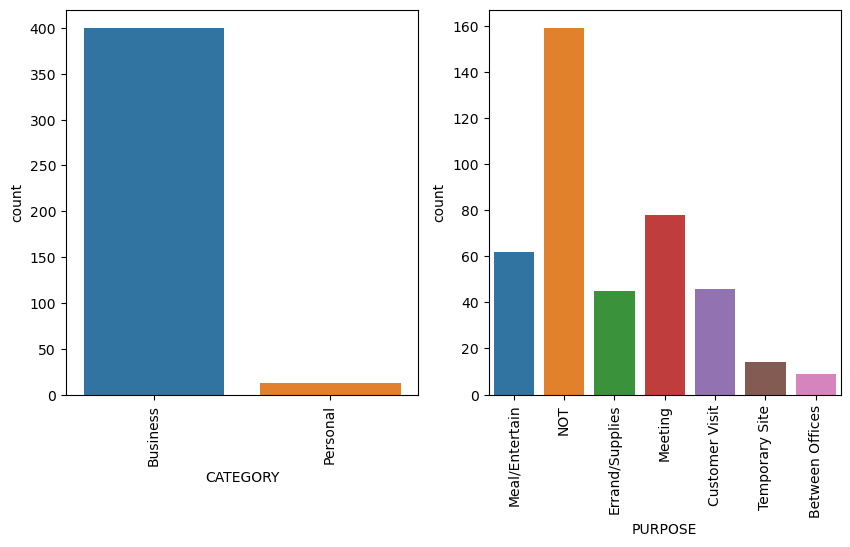

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=df['CATEGORY'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.countplot(x=df['PURPOSE'])
plt.xticks(rotation=90)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

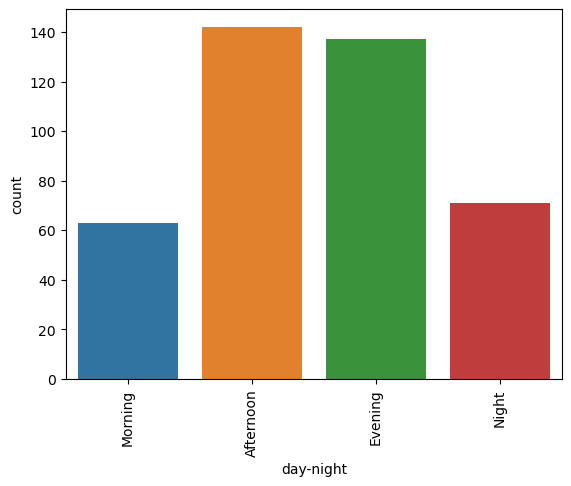

In [13]:
sns.countplot(x=df['day-night'])
plt.xticks(rotation=90)

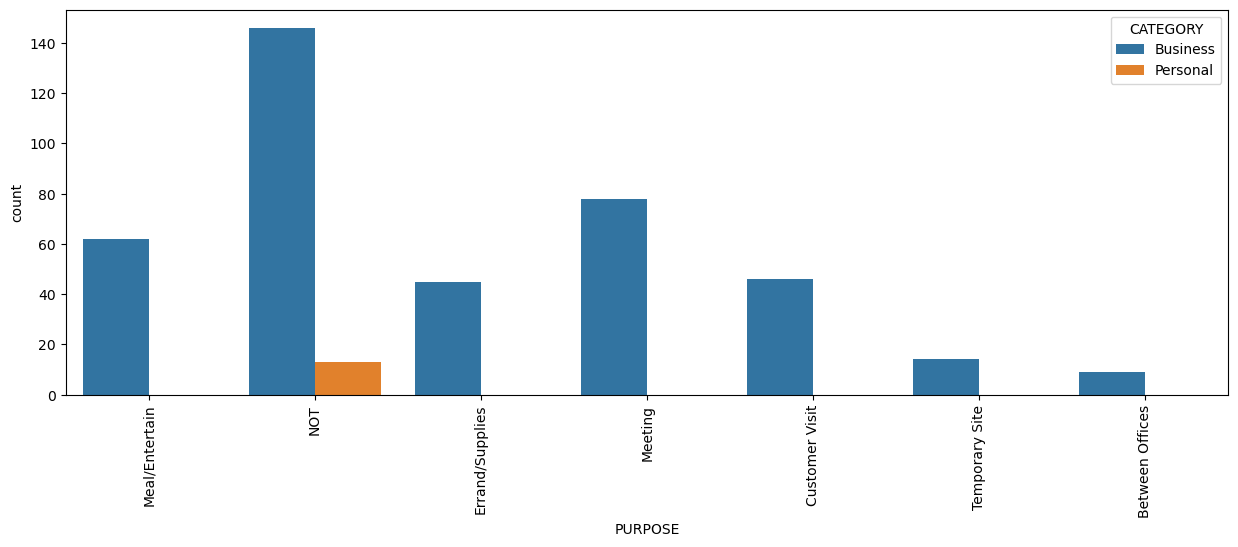

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

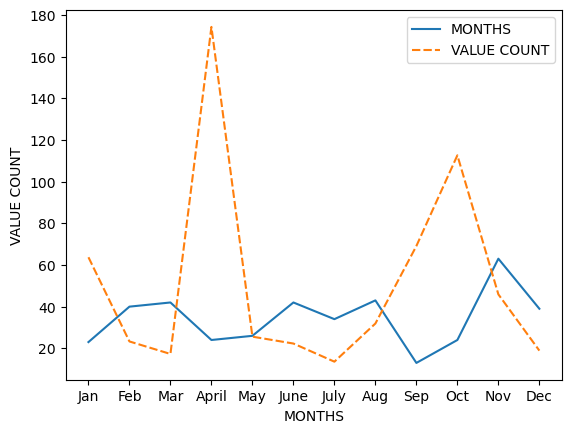

In [19]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df["MONTH"] = df.MONTH.map(month_label)
 
mon = df.MONTH.value_counts(sort=False)
 
# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": df.groupby('MONTH',
                                                  sort=False)['MILES'].max()})
 
p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [17]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['DAY'] = df['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

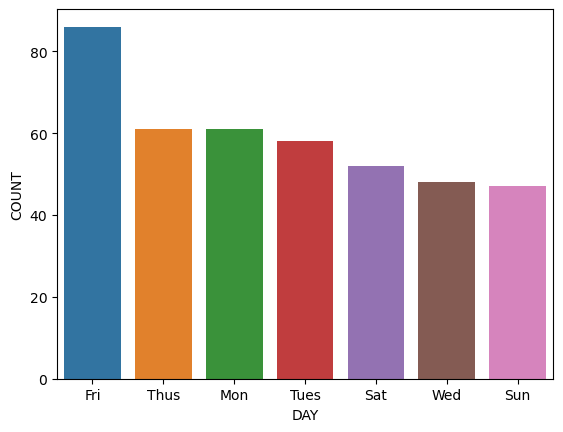

In [18]:
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: >

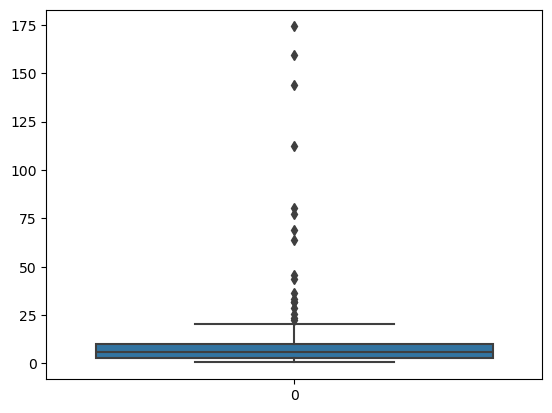

In [15]:
sns.boxplot(df['MILES'])

<Axes: >

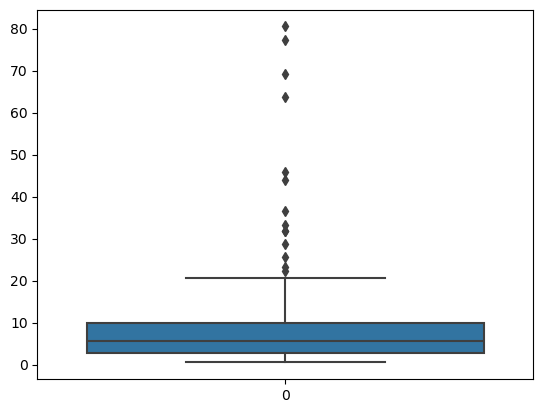

In [20]:
sns.boxplot(df[df['MILES']<100]['MILES'])

<Axes: xlabel='MILES', ylabel='Density'>

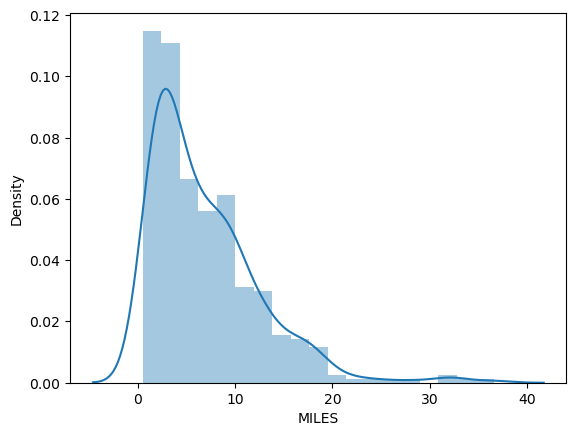

In [22]:
sns.distplot(df[df['MILES']<40]['MILES'])